# Computer Assignment 4

## Student names and student numbers: (edit this)
- Theo Koenig (4922301)
- Qiao-Ling Wang (4779525)
- Tip ten Brink (4927192)

### General TA feedback:

## Problem 1 : Fermi Statistics in a Closed System

### Exercise 1 : x/6 points

**TA Feedback:**

$$f_{FD} = \frac{1}{e^{\beta(E_r - \mu)} + 1}$$

From the above shown Fermi-Dirac distribution function, it is straightforward to see that the it is always smaller than or equal to 1. The denominator must simply be greater than or equal to 1. Seeing as the exponential factor is real, it never goes below 0 and the denominator therefore satisfies the condition:

$$e^{\beta(E_r - \mu)} + 1 \geq 1.$$

$$f_{BE} = \frac{1}{e^{\beta(E_r - \mu)} - 1}$$

Again, from the Bose-Einstein distribution function shown above, it is relatively simple to see that $\mu$ must be smaller than the ground state energy. If we were to assume that a $\mu$ larger than $E_r$ is possible then the distribution would become negative as the exponential becomes smaller than 1. This would mean that the number of particles in the state would be negative. If $\mu$ is equal to the ground state energy then there would be an infinite number of particles in the lowest single-particle state as the denominator goes to zero. Therefore $\mu$ must always be smaller than $E_r$.

### Exercise 2 : x/6 points

**TA Feedback:**

The ground state is the state in which all the particles have minimum energy. Since we have fermions,
each energy state can only be occupied by one particle. So we have a fermion occupying the first ten energy states,
$E_1$ to $E_{10}$. So the total system energy is the sum of these energies. Since $E_n = n\epsilon$ and we take
$\epsilon = 1$, the energy is equal to $1 + 2 + ... + 10 = 55$.

### Exercise 3 : x/12 points

**TA Feedback:**

Five more than the ground state of $55$ means there is a total energy of $60$. If we look at how to find a state with
an energy of 60 based on the ground state (which is 1 until 10 filled), we can add 11 and subtract 6, which is a
difference of 5, so we will have 60 energy.

The other states can be found by constantly interchanging the position of two 1s, one to an energy level that is 1
higher, the other to one that is 1 lower. This way, the following 7 microstates can be found. Based on the fraction
that these energy levels are filled, an occupation table for all the energy levels can be made.

States with particles in energy levels higher than 15 are not possible, because if you look at state 7, moving the
particle in level 15 to 16 leads to an increase of the energy level by 1, but all the other particles are already on
their ground levels and cannot reduce their energy, making it impossible for these states to exist.

The state for $n = 1$ is always filled because if you take the ground state with 55 energy, which is the minimum for
ten particles, and then remove the particle for energy level 1 and move it to energy level 11, which is the lowest
possible energy for ten particles where 1 is unfilled, it gives an energy of 65, which is more than 60 already. So for
that reason 1 must always be filled (same logic applies for 2 until 5).

| Energy level $\rightarrow$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15
| -------------------------- | - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | --
|                          1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1  | 1  |  0 |  0 | 0  |  0
|                          2 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1  | 0  |  1 |  0 | 0  |  0
|                          3 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 0  | 1  |  1 |  0 | 0  |  0
|                          4 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1  | 0  |  0 |  1 | 0  |  0
|                          5 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0  | 1  |  0 |  1 | 0  |  0
|                          6 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 1  | 0  |  0 |  0 | 1  |  0
|                          7 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0  | 0  |  0 |  0 | 0  |  1

| Level $\rightarrow$      | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15
| -------------------------| - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | --
| Occupation $\rightarrow$ | 1 | 1 | 1 | 1 | 1 |6/7|6/7|5/7|5/7| 4/7| 3/7| 2/7| 2/7| 1/7| 1/7

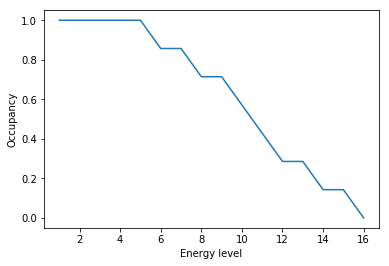

In [2]:
import matplotlib.pyplot as plt

occupations = [[1, 1], [2, 1], [3, 1], [5, 1], [6, 6/7], [7, 6/7], [8, 5/7], [9, 5/7], [10, 4/7], [11, 3/7], [12, 2/7],
               [13, 2/7], [14, 1/7], [15, 1/7], [16, 0]]
x_arr_3, y_arr_3 = zip(*occupations)

plt.plot(x_arr_3, y_arr_3)
plt.xlabel('Energy level')
plt.ylabel('Occupancy')
plt.show()

The plot shows the occupancy fraction for all the energy levels up until an energy of 16, which has an occupancy of
zero, as do all energies higher than that.

### Exercise 4 : x/12 points

**TA Feedback:**

We know from the theory that the occupancy curve should analytically have the form of the Fermi-Dirac distribution. As
such we perform a simple SciPy curve fit to the graph of the occupancy. Based on the formula for the Fermi-Dirac
distribution, the parameters of this fit are equal to $\beta$ and $\mu$. This allows us to find their value from the
fit.

$$f_{BE} = \frac{1}{e^{\beta(E_n - \mu)} - 1}$$

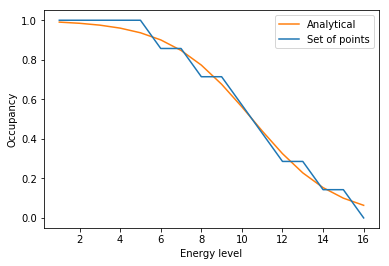

0.48912781481107054
10.505650697729111


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Use the following function:
from scipy import optimize

# Use the following start position p0 = [1,7] , where 1 denotes the initial value of beta, and 7 that of mu.
p0 = [1,7]

#Constants used
k_b = 1.38064852e-23

def fermi_dirac(x, a, b):
    return 1/(np.exp(a * (x - b)) + 1)

def analyze_fermi_dirac(x_arr, y_arr, p0=None):
    if p0:
        params, params_covariance = optimize.curve_fit(fermi_dirac, x_arr, y_arr, p0, bounds=([0, -np.inf], [np.inf, np.inf]))
    else:
        params, params_covariance = optimize.curve_fit(fermi_dirac, x_arr, y_arr, bounds=([0, -np.inf], [np.inf, np.inf]))
    beta = params[0]
    mu = params[1]
    return beta, mu

beta_4, mu_4 = analyze_fermi_dirac(x_arr_3, y_arr_3, p0)

x_4 = np.arange(1, 17)
plt.errorbar(x_arr_3, y_arr_3, label='Set of points')
plt.plot(x_4, fermi_dirac(x_4, beta_4, mu_4), label='Analytical')
plt.xlabel('Energy level')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

print(beta_4)
print(mu_4)

The plot shows the occupancy plot from exercise 3, as well as the analytical fit. From this, we found values for $\beta$
and $\mu$ of 0.489 and 10.5, respectively.

### Exercise 5 : x/14 points

**TA Feedback:**

We now use a calculation to find all the possible partitions, as for higher $N$ and $\delta E$ it becomes unworkable to 
do this by hand. The function returns "scatter" data that shows a scatter point on a specific x,y coordinate if there is 
a particle in the particular partition position corresponding to that x,y pair.

By using the energy levels in the scatter data as "bins", we can use numpy bincount to find the number of occurences of
each energy level. Dividing this by the amount of partitions gives us the normalized occupancy of each energy level.

Plotting us then gives us an occupancy plot similar to previous exercises. We again perform a curve fit to find the
analytical function corresponding to the occupancy plot.

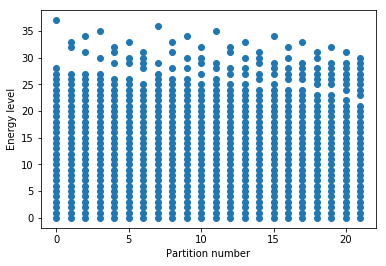

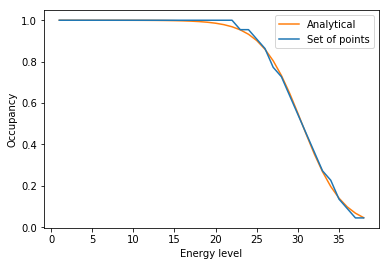

In [4]:
# Use these standard functions to calculate the partitions, using calc_fermi(N,E) . 
# You don't need to use accel_asc, it is used inside the function calc_fermi.
def accel_asc(n, part_num):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while (2 * x <= y) and (k<part_num-1):
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while (x <= y) and (k<part_num-1):
            a[k] = x
            a[l] = y
            yield a[:k + 2]
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield a[:k + 1]

def calc_fermi(N, E):
    p = np.zeros((1,N))
    part_cnt = 0
    for m in accel_asc(E, N):
        p[part_cnt,:len(m)] = list(reversed(m))
        part_cnt = part_cnt + 1     
        p = np.vstack((p, np.zeros(N, dtype=int)))
    p = p[:part_cnt,:]
    x_scatter = np.repeat(np.arange(0,part_cnt),N)
    p_flat = np.reshape(p[:part_cnt,:],(1,p.size))
    y_scatter = np.tile(np.arange(0,N),part_cnt) +p_flat[0,::-1]
    return x_scatter.astype(float), y_scatter, part_cnt

x_scatter_5, y_scatter_5, part_num_5 = calc_fermi(30, 8)
plt.scatter(x_scatter_5, y_scatter_5, marker = 'o')
plt.xlabel('Partition number')
plt.ylabel('Energy level')
plt.show()

y_arr_5 = np.bincount(y_scatter_5.astype(int))/part_num_5
x_arr_5 = np.arange(1, len(y_arr_5)+1)
beta_5, mu_5 = analyze_fermi_dirac(x_arr_5, y_arr_5)

plt.errorbar(x_arr_5, y_arr_5, label='Set of points')
y_fermi_dirac_5 = fermi_dirac(x_arr_5, beta_5, mu_5)
plt.plot(x_arr_5, y_fermi_dirac_5, label='Analytical')
plt.xlabel('Energy level')
plt.ylabel('Occupancy')
plt.legend()
plt.show()



### Exercise 6 : x/12 points

**TA Feedback:**

$$\frac{1}{k_B T} = \left( \frac{\delta S/k_B}{\delta U} \right)_{V, \ N}$$ is the relation we will use. The left-hand
side is equal to $\beta$.

To calculate this difference, we use that $\frac{d y}{d x}$ is approximately equal to $\frac{y_2 - y_1}{x_2 - x_1}$ for
a small distance in $x$. We use three separate differences, all with the base state being $N = 30$ and $\Delta E = 10$,
which we call $E$. 

We first calculate the number of partitions for $E$, $E + 1$ and $E - 1$.
Then we calculate the corresponding logarithms and calculate the differences according to the three methods, which are
(i) the difference between $E+1$ and $E$, (ii) the difference between $E$ and $E-1$ and (iii) half the difference
between $E+1$ and $E-1$.

We also perform a fit based on an occupancy calculation as we did before. This gives also gives us a value for $\beta$.

In [9]:
E = 10
N = 30

def calc_beta_diff(E, N):
    part_num_E = calc_fermi(N, E)[2]
    part_num_Ep1 = calc_fermi(N, E+1)[2]
    part_num_Em1 = calc_fermi(N, E-1)[2]
    
    s_d_kb_E = np.log(part_num_E)
    s_d_kb_Ep1 = np.log(part_num_Ep1)
    s_d_kb_Em1 = np.log(part_num_Em1)
    
    beta_forw_diff = s_d_kb_Ep1 - s_d_kb_E
    beta_back_diff = s_d_kb_E - s_d_kb_Em1
    beta_cent_diff = ((s_d_kb_Ep1 - s_d_kb_Em1) / 2)

    return beta_forw_diff, beta_back_diff, beta_cent_diff

beta_forw_diff_6, beta_back_diff_6, beta_cent_diff_6 = calc_beta_diff(E, N)

print("forward difference: " + str(beta_forw_diff_6)) # (i) E+1, E
print("backwards difference: " + str(beta_back_diff_6))# (ii) E, E-1
print("center difference: " + str(beta_cent_diff_6)) # (iii) E+1, E-1

x_scatter_6, y_scatter_6, part_num_6 = calc_fermi(E, N)
y_arr_6 = np.bincount(y_scatter_6.astype(int))/part_num_6
x_arr_6 = np.arange(1, len(y_arr_6)+1)
beta_6, mu_6 = analyze_fermi_dirac(x_arr_6, y_arr_6)

print("fit: " + str(beta_6))

forward difference: 0.28768207245178123
backwards difference: 0.33647223662121295
center difference: 0.3120771545364971
fit: 0.19075820804812024


As results we now have three values for $\beta$ calculated using this thermodynamic relation. As expected, the central
difference (iii, 0.312) lies in between the forward difference (i, 0.288) and backward difference (ii, 0.334). The values are quite different
from the value found using a fit (0.191). This can be explained by the fact that using a difference to approximate a derivative
is much less accurate for relatively low levels of energy, since then a single difference in energy is quite large, 
relatively.

### Exercise 7 : x/18 points

**TA Feedback:**

We use a similar relation as done in excercise 6, but this time we use the thermodynamic relation to find the chemical potential $\mu$.

$$\frac{\mu}{k_B T} = \left( \frac{\delta S/k_B}{\delta N} \right)_{U, \ V}$$

Using similar approximations, we are able to again use three separate differences, with the shared base state $N = 6$ and $\Delta E = 7$.

The number of partitions for $N$, $N + 1$ and $N - 1$ are first calculated, from which we are able to obtain their respective entropies. According to the three difference methods we then calculate three different values for $\mu$.

Finally, we also perform a fit based on an occupancy calculation as done previously. This gives gives us a fourth value for $\mu$, which we compare to the values found using the difference methods.

In [13]:
E = 7
N = 6

beta_forw_diff_7, beta_back_diff_7, beta_cent_diff_7 = calc_beta_diff(E, N)

part_num_Nu = calc_fermi(N, E)[2]
part_num_Np1 = calc_fermi(N+1, E)[2]
part_num_Nm1 = calc_fermi(N-1, E)[2]

S = np.log(part_num_Nu)
Sp1 = np.log(part_num_Np1)
Sm1 = np.log(part_num_Nm1)

mu_forw_diff = 1/beta_forw_diff_7 * (Sp1 - S)
mu_back_diff = 1/beta_back_diff_7 * (S - Sm1)
mu_cent_diff = 1/beta_cent_diff_7 * (Sp1 - Sm1)/2

print("forward difference: " + str(mu_forw_diff))# (i) N+1, N
print("backwards difference: " + str(mu_back_diff))# (ii) N, N-1
print("center difference: " + str(mu_cent_diff)) # (iii) N+1, N-1, /2

x_scatter_7, y_scatter_7, part_num_7 = calc_fermi(E, N)
y_arr_7 = np.bincount(y_scatter_7.astype(int))/part_num_7
x_arr_7 = np.arange(1, len(y_arr_7)+1)
beta_7, mu_7 = analyze_fermi_dirac(x_arr_7, y_arr_7)

print("fit: " + str(mu_7))

forward difference: 0.19343346837058129
backwards difference: 0.3072953230366218
center difference: 0.2393643141187394
fit: 7.517531388674455


As results we now have three values for $\mu$ calculated using this thermodynamic relation. As expected, the central
difference (iii, 0.239) lies in between the forward difference (i, 0.193) and backward difference (ii, 0.307). The values are quite different from the value found using a fit (7.517).

### Exercise 8 : x/20 points

**TA Feedback:**

[0 1 2 3 4 5 6 7]
[7 6 5 4 3 2 1 0]


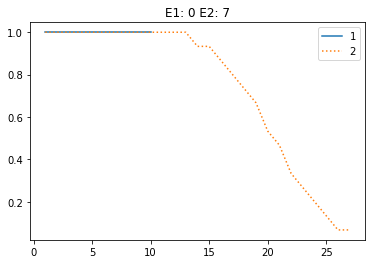

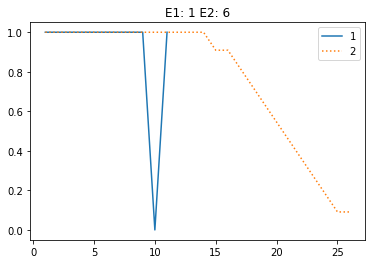

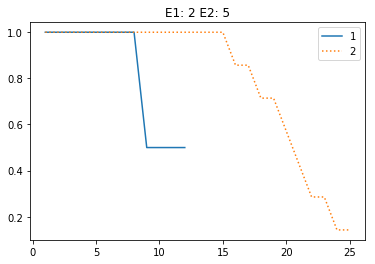

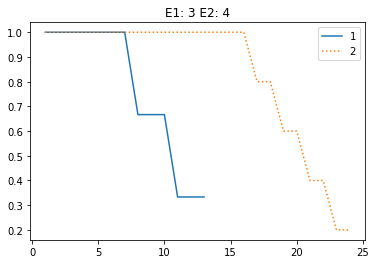

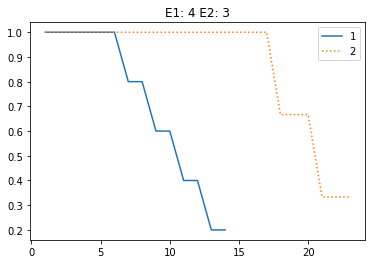

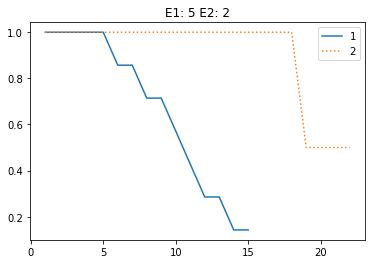

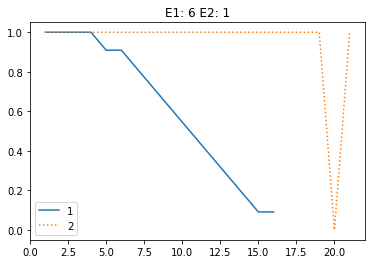

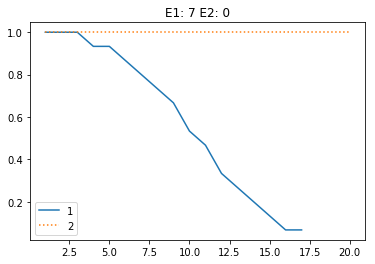

In [14]:
E1 = np.arange(0, 8, 1)
E2 = np.arange(7, -1, -1)
print(E1)
print(E2)

N1 = 10
N2 = 20

for i in range(len(E1)):
    x1_scatter, y1_scatter, part_num1 = calc_fermi(N1, E1[i])
    x2_scatter, y2_scatter, part_num2 = calc_fermi(N2, E2[i])

    y1_arr = np.bincount(y1_scatter.astype(int)) / part_num1
    x1_arr = np.arange(1, len(y1_arr) + 1)

    y2_arr = np.bincount(y2_scatter.astype(int)) / part_num2
    x2_arr = np.arange(1, len(y2_arr) + 1)

    plt.plot(x1_arr, y1_arr, label='1')
    plt.plot(x2_arr, y2_arr, label='2', linestyle=':')
    plt.title("E1: " + str(E1[i]) + " E2: " + str(E2[i]))
    plt.legend()
    plt.show()

It can be observed that the shape of the plots is largely determined by the $\Delta$E. For example the shape of the E1 curve, where $\Delta$E1 = 1, is similar to the shape of the E2 curve, where $\Delta$E2 = 1. This is the case for all $\Delta$E1 and $\Delta$E2.

A difference however, is the fact that the range of energy levels from system E1 appears to be lower than that of system E2. This is because E2 has more particles, so it is to be expected that E2 will have more energy levels, as there are more configurations possible.